#Lectura y procesamiento de los resultados de los mejores modelos ESN

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de ESN. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/esn/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/esn


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsESN2S = pd.read_excel('grilla_ESN_NARMAX_2STEPS.xlsx', header=0)
summaryModelsESN4S = pd.read_excel('grilla_ESN_NARMAX_4STEPS.xlsx', header=0)
summaryModelsESN8S = pd.read_excel('grilla_ESN_NARMAX_8STEPS.xlsx', header=0)
summaryModelsESN16S = pd.read_excel('grilla_ESN_NARMAX_16STEPS.xlsx', header=0)

grilla_ESN_NARMAX_AQP = pd.concat([summaryModelsESN2S, summaryModelsESN4S], ignore_index=True)
grilla_ESN_NARMAX_AQP = pd.concat([grilla_ESN_NARMAX_AQP, summaryModelsESN8S], ignore_index=True)
grilla_ESN_NARMAX_AQP = pd.concat([grilla_ESN_NARMAX_AQP, summaryModelsESN16S], ignore_index=True)

grilla_ESN_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAE                     288 non-null    float64
 1   delayedSteps            288 non-null    int64  
 2   nameModel               288 non-null    object 
 3   nameHistory             288 non-null    object 
 4   nameConfiguration       288 non-null    object 
 5   timeTrain (in seconds)  288 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.6+ KB


##La cantidad de modelos generados para el ESN NARX de AQP fue de 288

In [4]:
rslt_df = grilla_ESN_NARMAX_AQP.sort_values('MAE')
total = grilla_ESN_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_ESN_NARMAX_AQP.describe()

Tiempo total: 55696.67999999999


MAE  delayedSteps  timeTrain (in seconds)
count  288.000000    288.000000              288.000000
mean     0.311670      7.500000              193.391250
std      0.028879      5.371236              140.010105
min      0.278936      2.000000               60.910000
25%      0.298787      3.500000              101.570000
50%      0.307310      6.000000              151.275000
75%      0.317768     10.000000              221.442500
max      0.485316     16.000000              812.520000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 55696, lo que equivale a 15 horas aproximadamente. Además se tienen las estadisticas resumen.

In [6]:
rslt_df.iloc[:50,:]

MAE  ...  timeTrain (in seconds)
259  0.278936  ...                  415.48
239  0.279343  ...                  203.05
281  0.279394  ...                  724.72
263  0.280357  ...                  368.83
255  0.281165  ...                  167.21
277  0.281707  ...                  744.46
275  0.281864  ...                  538.57
227  0.281872  ...                   93.19
279  0.282297  ...                  672.70
217  0.282817  ...                  104.23
273  0.283189  ...                  371.85
261  0.283228  ...                  418.32
243  0.283920  ...                  290.56
237  0.283977  ...                  127.80
221  0.284340  ...                   97.02
235  0.285518  ...                  137.26
257  0.285753  ...                  162.70
258  0.285811  ...                  223.55
276  0.286060  ...                  373.00
245  0.286362  ...                  200.30
225  0.287056  ...                  240.99
233  0.287173  ...                   99.30
253  0.287781  ...                  155.99
191  0.288292  ...                  333.93
219  0.288393  ...                  132.54
287  0.288482  ...                  812.52
267  0.288628  ...                  291.07
231  0.289051  ...                  219.02
262  0.289256  ...                  271.97
251  0.289271  ...                  115.05
226  0.289453  ...                  113.82
249  0.290288  ...                  194.20
205  0.290744  ...                  773.19
229  0.290744  ...                  122.04
201  0.290930  ...                  275.30
224  0.290935  ...                  161.74
247  0.291112  ...                  206.99
265  0.291158  ...                  287.71
173  0.291270  ...                  241.24
269  0.291329  ...                  157.03
207  0.291513  ...                  785.95
271  0.291720  ...                  374.76
209  0.291904  ...                  782.53
285  0.291922  ...                  313.19
169  0.291965  ...                  161.96
280  0.292613  ...                  510.26
183  0.293060  ...                  129.48
203  0.293096  ...                  334.74
189  0.293188  ...                  267.47
163  0.293320  ...                  177.35

[50 rows x 6 columns]

In [7]:
rslt_df.iloc[0,:]

MAE                                                                0.278936
delayedSteps                                                             16
nameModel                 results/ESN_1647_1_128_sigmoid_relu_mean_absol...
nameHistory               results/ESN_1647_1_128_sigmoid_relu_mean_absol...
nameConfiguration         results/ESN_1647_1_128_sigmoid_relu_mean_absol...
timeTrain (in seconds)                                               415.48
Name: 259, dtype: object

In [8]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAE                                                                0.278936
delayedSteps                                                             16
nameModel                 results/ESN_1647_1_128_sigmoid_relu_mean_absol...
nameHistory               results/ESN_1647_1_128_sigmoid_relu_mean_absol...
nameConfiguration         results/ESN_1647_1_128_sigmoid_relu_mean_absol...
timeTrain (in seconds)                                               415.48
Name: 259, dtype: object


In [9]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])


results/ESN_1647_1_128_sigmoid_relu_mean_absolute_error_16S_history.npy
results/ESN_1647_1_128_sigmoid_relu_mean_absolute_error_16S_config.npy
results/ESN_1647_1_128_sigmoid_relu_mean_absolute_error_16S.h5


In [10]:
pip install tensorflow-addons

     |████████████████████████████████| 706kB 5.9MB/s 


In [13]:
import tensorflow_addons as tfa

In [14]:
#para recuperar history
history=np.load('ESN_1647_1_128_sigmoid_relu_mean_absolute_error_16S_history.npy',allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load('ESN_1647_1_128_sigmoid_relu_mean_absolute_error_16S_config.npy',allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model('ESN_1647_1_128_sigmoid_relu_mean_absolute_error_16S.h5')
print(saved_model.summary())
#print(saved_model.layers[2].get_config())

{'loss': [0.2989925146102905, 0.2860441207885742, 0.2839469015598297, 0.28347352147102356, 0.28219303488731384, 0.2818686068058014, 0.281624972820282, 0.27982714772224426, 0.2802841067314148, 0.2818618714809418, 0.2793375551700592, 0.27938389778137207, 0.2784944176673889, 0.2785431742668152, 0.27810752391815186, 0.27846869826316833, 0.2788306474685669, 0.27811047434806824, 0.2790444493293762, 0.27856892347335815, 0.27813389897346497, 0.278143048286438, 0.2787778973579407, 0.27734723687171936, 0.2779712975025177, 0.2774540185928345, 0.2774243950843811, 0.27877774834632874, 0.2774890065193176, 0.27738189697265625, 0.2772749066352844, 0.27806586027145386, 0.2777077853679657, 0.27702683210372925, 0.2774212956428528, 0.2769656181335449, 0.2768505811691284, 0.27714070677757263, 0.2766437828540802, 0.2776660919189453, 0.2778182327747345, 0.27776214480400085, 0.27639633417129517, 0.2763822674751282, 0.2771541178226471, 0.27665960788726807, 0.2760780453681946, 0.27605077624320984, 0.27678388357

In [15]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledESN.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledESN.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxESN.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxESN.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 45):
  cont = 0
  X = list()
  y = list()

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  for chunk_id in chunk_ids:
    rows = data.loc[(data['chunkID'] == chunk_id)]
    #print(rows)
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    for _, row in rows.iterrows():
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        salidaAux = rows.iloc[indexTarget, columnTarget]
        xAux = rows.iloc[indexAux:end_row, :].values
        #print(xAux.shape)
        #print(xAux)
        X.append(xAux)
        y.append(salidaAux)
        #print(salidaAux)
      indexAux = indexAux + 1
    cont = cont + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY

def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()

def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled

# calculate the error between an actual and predicted value
def calculate_error(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)

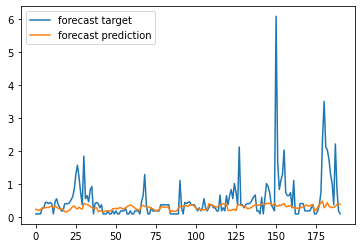

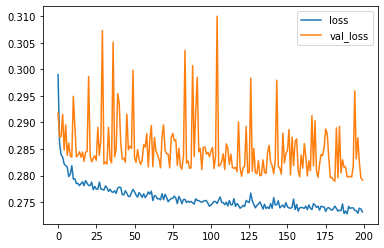

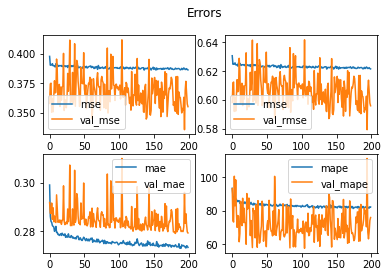

In [16]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 24, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:191]
validation_predictions = saved_model.predict(testXScaled[:191,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)